In [ ]:
import pandas as pd


#Read the dataset from local drive
influencer_df = pd.read_csv("C:\\Users\\Alex\\OneDrive\\桌面\\CDS590D_sourcecode\\influencer_list_modified.csv", low_memory=False, keep_date_col=True, nrows=100000)
influencer_df.head(10)

In [ ]:
username_dict = influencer_df["username"].tolist()
follow_by_dict = influencer_df["total_follow_by"].tolist()
followby_count = influencer_df["count"].tolist()
iteration = influencer_df["iteration"].tolist()


combined_dict = {}
for key in username_dict:
    combined_dict[key] = []
    for value in follow_by_dict:
        combined_dict[key].append(value)
        follow_by_dict.remove(value)
        break
        
    for value1 in followby_count:
        combined_dict[key].append(value1)
        followby_count.remove(value1)
        break
        
    for value2 in iteration:
        combined_dict[key].append(value2)
        iteration.remove(value2)
        break
        

In [ ]:
import networkx as nx

G_asymmetric = nx.DiGraph()
count = 0
for key, values in combined_dict.items():
    for value in values[:-2]:
        followby_list = value.split(",")
        
        for follower in followby_list:
            G_asymmetric.add_edge(follower,key)
    

In [ ]:
import matplotlib.pyplot as plt

nx.spring_layout(G_asymmetric)
#nx.draw_networkx(G_asymmetric)

nx.draw(G_asymmetric, with_labels=True)
plt.figure(figsize=(1000, 1000))
plt.show()

In [ ]:
print(nx.info(G_asymmetric))

In [ ]:
degree_centrality = nx.degree_centrality(G_asymmetric)

In [ ]:
eigenvector_centrality = nx.eigenvector_centrality(G_asymmetric)

In [ ]:
closeness_centrality = nx.closeness_centrality(G_asymmetric)

In [ ]:
pagerank = nx.pagerank(G_asymmetric, alpha=0.85)

In [ ]:
degree_centrality_df = pd.DataFrame.from_dict(degree_centrality, orient="index").reset_index()
degree_centrality_df = degree_centrality_df.rename(columns={ 'index': 'username', 0: 'degree_centrality'})
degree_centrality_df.head(5)

In [ ]:
eigenvector_centrality_df = pd.DataFrame.from_dict(eigenvector_centrality, orient="index").reset_index()
eigenvector_centrality_df = eigenvector_centrality_df.rename(columns={ 'index': 'username', 0: 'eigenvector_centrality'})
eigenvector_centrality_df.head(5)

In [ ]:
closeness_centrality_df = pd.DataFrame.from_dict(closeness_centrality, orient="index").reset_index()
closeness_centrality_df = closeness_centrality_df.rename(columns={ 'index': 'username', 0: 'closeness_centrality'})
closeness_centrality_df.head(5)

In [ ]:
pagerank_df = pd.DataFrame.from_dict(pagerank, orient="index").reset_index()
pagerank_df = pagerank_df.rename(columns={ 'index': 'username', 0: 'pagerank'})
pagerank_df.head(5)

In [ ]:
final_influencer_df = influencer_df.merge(degree_centrality_df, on=['username'])
final_influencer_df = final_influencer_df.merge(eigenvector_centrality_df, on=['username'])
final_influencer_df = final_influencer_df.merge(closeness_centrality_df, on=['username'])
final_influencer_df = final_influencer_df.merge(pagerank_df, on=['username'])


In [ ]:
# Popularity_score = Retweets + Likes
# Reach_score = Followers — Following
final_influencer_df['Popularity_score'] = final_influencer_df['retweets_count'] + final_influencer_df['likes_count']
final_influencer_df['Reach_score'] = final_influencer_df['followers_count'] - final_influencer_df['following_count']

In [ ]:
final_influencer_df["Popularity_score_norm"] = (final_influencer_df["Popularity_score"]-final_influencer_df["Popularity_score"].min()) / (final_influencer_df["Popularity_score"].max()-final_influencer_df["Popularity_score"].min())
final_influencer_df["Reach_score_norm"] = (final_influencer_df["Reach_score"]-final_influencer_df["Reach_score"].min()) / (final_influencer_df["Reach_score"].max()-final_influencer_df["Reach_score"].min())

final_influencer_df["degree_centrality_norm"] = (final_influencer_df["degree_centrality"]-final_influencer_df["degree_centrality"].min()) / (final_influencer_df["degree_centrality"].max()-final_influencer_df["degree_centrality"].min())
final_influencer_df["eigenvector_centrality_norm"] = (final_influencer_df["eigenvector_centrality"]-final_influencer_df["eigenvector_centrality"].min()) / (final_influencer_df["eigenvector_centrality"].max()-final_influencer_df["eigenvector_centrality"].min())
final_influencer_df["closeness_centrality_norm"] = (final_influencer_df["closeness_centrality"]-final_influencer_df["closeness_centrality"].min()) / (final_influencer_df["closeness_centrality"].max()-final_influencer_df["closeness_centrality"].min())
final_influencer_df["pagerank_norm"] = (final_influencer_df["pagerank"]-final_influencer_df["pagerank"].min()) / (final_influencer_df["pagerank"].max()-final_influencer_df["pagerank"].min())
final_influencer_df["occurrence_norm"] = (final_influencer_df["count"]-final_influencer_df["count"].min()) / (final_influencer_df["count"].max()-final_influencer_df["count"].min())

In [ ]:
influencer_norm_df = final_influencer_df.drop(['count','id','verified','total_follow_by','degree_centrality','eigenvector_centrality','closeness_centrality','pagerank','iteration','followers_count','following_count','tweet_count','listed_count','replies_count','retweets_count','likes_count','Popularity_score','Reach_score','follow_by1','follow_by2','follow_by3','follow_by4'], axis=1)
influencer_norm_df.head(5)

In [ ]:
influencer_norm_df['final_score'] = \
influencer_norm_df["Popularity_score_norm"] + \
influencer_norm_df["Reach_score_norm"] + \
influencer_norm_df["degree_centrality_norm"] + \
influencer_norm_df["eigenvector_centrality_norm"] + \
influencer_norm_df["closeness_centrality_norm"] + \
influencer_norm_df["pagerank_norm"] + \
influencer_norm_df["occurrence_norm"] 


influencer_norm_df.head(5)

In [ ]:
influencer_norm_df["Ranking"] = influencer_norm_df["final_score"].rank(method='max') / 100
influencer_norm_df.head(5)

In [ ]:
influencer_norm_df.to_csv('influencer_norm_df.csv')

# Sentiment Analysis

In [ ]:
import pandas as pd
from nltk.corpus import stopwords
import re
import pandas as pd
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import spacy
import nltk
import re
from functools import partial
from collections import Counter
import nltk
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

stop = stopwords.words('english')
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

#Read the dataset from local drive
tweet_df = pd.read_csv("C:\\Users\\Alex\\OneDrive\\桌面\\CDS590D_SourceCode\\tweet_filter\\full_tweet_list.csv", low_memory=False, keep_date_col=True, nrows=150000)

In [ ]:
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–", "»","\n"]

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


In [ ]:
import re
from functools import partial
from collections import Counter
import nltk
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

def removeUnicode(text):
    """ Removes unicode strings like "\u002c" and "x96" """
    text = re.sub(r'(\\u[0-9A-Fa-f]+)',r'', text)       
    text = re.sub(r'[^\x00-\x7f]',r'',text)
    return text

def replaceURL(text):
    """ Replaces url address with "url" """
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','url',text)
    text = re.sub(r'#([^\s]+)', r'\1', text)
    return text

def replaceAtUser(text):
    """ Replaces "@user" with "atUser" """
    text = re.sub('@[^\s]+','atUser',text)
    return text

def removeHashtagInFrontOfWord(text):
    """ Removes hastag in front of a word """
    text = re.sub(r'#([^\s]+)', r'\1', text)
    return text

def removeNumbers(text):
    """ Removes integers """
    text = ''.join([i for i in text if not i.isdigit()])         
    return text

def replaceMultiExclamationMark(text):
    """ Replaces repetitions of exlamation marks """
    text = re.sub(r"(\!)\1+", ' multiExclamation ', text)
    return text

def replaceMultiQuestionMark(text):
    """ Replaces repetitions of question marks """
    text = re.sub(r"(\?)\1+", ' multiQuestion ', text)
    return text

def replaceMultiStopMark(text):
    """ Replaces repetitions of stop marks """
    text = re.sub(r"(\.)\1+", ' multiStop ', text)
    return text

def countMultiExclamationMarks(text):
    """ Replaces repetitions of exlamation marks """
    return len(re.findall(r"(\!)\1+", text))

def countMultiQuestionMarks(text):
    """ Count repetitions of question marks """
    return len(re.findall(r"(\?)\1+", text))

def countMultiStopMarks(text):
    """ Count repetitions of stop marks """
    return len(re.findall(r"(\.)\1+", text))

def countElongated(text):
    """ Input: a text, Output: how many words are elongated """
    regex = re.compile(r"(.)\1{2}")
    return len([word for word in text.split() if regex.search(word)])

def countAllCaps(text):
    """ Input: a text, Output: how many words are all caps """
    return len(re.findall("[A-Z0-9]{3,}", text))

""" Creates a dictionary with slangs and their equivalents and replaces them """
with open('C:\\Users\\Alex\\OneDrive\\桌面\\CDS590D_SourceCode\\slang.txt') as file:
    slang_map = dict(map(str.strip, line.partition('\t')[::2])
    for line in file if line.strip())

slang_words = sorted(slang_map, key=len, reverse=True) # longest first for regex
regex = re.compile(r"\b({})\b".format("|".join(map(re.escape, slang_words))))
replaceSlang = partial(regex.sub, lambda m: slang_map[m.group(1)])

def countSlang(text):
    """ Input: a text, Output: how many slang words and a list of found slangs """
    slangCounter = 0
    slangsFound = []
    tokens = nltk.word_tokenize(text)
    for word in tokens:
        if word in slang_words:
            slangsFound.append(word)
            slangCounter += 1
    return slangCounter, slangsFound

""" Replaces contractions from a string to their equivalents """
contraction_patterns = [ (r'won\'t', 'will not'), (r'can\'t', 'cannot'), (r'i\'m', 'i am'), (r'ain\'t', 'is not'), (r'(\w+)\'ll', '\g<1> will'), (r'(\w+)n\'t', '\g<1> not'),
                         (r'(\w+)\'ve', '\g<1> have'), (r'(\w+)\'s', '\g<1> is'), (r'(\w+)\'re', '\g<1> are'), (r'(\w+)\'d', '\g<1> would'), (r'&', 'and'), (r'dammit', 'damn it'), (r'dont', 'do not'), (r'wont', 'will not') ]
def replaceContraction(text):
    patterns = [(re.compile(regex), repl) for (regex, repl) in contraction_patterns]
    for (pattern, repl) in patterns:
        (text, count) = re.subn(pattern, repl, text)
    return text

def replaceElongated(word):
    """ Replaces an elongated word with its basic form, unless the word exists in the lexicon """

    repeat_regexp = re.compile(r'(\w*)(\w)\2(\w*)')
    repl = r'\1\2\3'
    if wordnet.synsets(word):
        return word
    repl_word = repeat_regexp.sub(repl, word)
    if repl_word != word:      
        return replaceElongated(repl_word)
    else:       
        return repl_word

def removeEmoticons(text):
    """ Removes emoticons from text """
    text = re.sub(':\)|;\)|:-\)|\(-:|:-D|=D|:P|xD|X-p|\^\^|:-*|\^\.\^|\^\-\^|\^\_\^|\,-\)|\)-:|:\'\(|:\(|:-\(|:\S|T\.T|\.\_\.|:<|:-\S|:-<|\*\-\*|:O|=O|=\-O|O\.o|XO|O\_O|:-\@|=/|:/|X\-\(|>\.<|>=\(|D:', '', text)
    return text

def countEmoticons(text):
    """ Input: a text, Output: how many emoticons """
    return len(re.findall(':\)|;\)|:-\)|\(-:|:-D|=D|:P|xD|X-p|\^\^|:-*|\^\.\^|\^\-\^|\^\_\^|\,-\)|\)-:|:\'\(|:\(|:-\(|:\S|T\.T|\.\_\.|:<|:-\S|:-<|\*\-\*|:O|=O|=\-O|O\.o|XO|O\_O|:-\@|=/|:/|X\-\(|>\.<|>=\(|D:', text))


### Spell Correction begin ###
""" Spell Correction http://norvig.com/spell-correct.html """
def words(text): return re.findall(r'\w+', text.lower())

WORDS = Counter(words(open('C:\\Users\\Alex\\OneDrive\\桌面\\CDS590D_SourceCode\\corporaForSpellCorrection.txt').read()))

def P(word, N=sum(WORDS.values())): 
    """P robability of `word`. """
    return WORDS[word] / N

def spellCorrection(word): 
    """ Most probable spelling correction for word. """
    return max(candidates(word), key=P)

def candidates(word): 
    """ Generate possible spelling corrections for word. """
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words): 
    """ The subset of `words` that appear in the dictionary of WORDS. """
    return set(w for w in words if w in WORDS)

def edits1(word):
    """ All edits that are one edit away from `word`. """
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    """ All edits that are two edits away from `word`. """
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

### Spell Correction End ###

### Replace Negations Begin ###

def replace(word, pos=None):
    """ Creates a set of all antonyms for the word and if there is only one antonym, it returns it """
    antonyms = set()
    for syn in wordnet.synsets(word, pos=pos):
      for lemma in syn.lemmas():
        for antonym in lemma.antonyms():
          antonyms.add(antonym.name())
    if len(antonyms) == 1:
      return antonyms.pop()
    else:
      return None

def replaceNegations(text):
    """ Finds "not" and antonym for the next word and if found, replaces not and the next word with the antonym """
    i, l = 0, len(text)
    words = []
    while i < l:
      word = text[i]
      if word == 'not' and i+1 < l:
        ant = replace(text[i+1])
        if ant:
          words.append(ant)
          i += 2
          continue
      words.append(word)
      i += 1
    return words

### Replace Negations End ###

def addNotTag(text):
    """ Finds "not,never,no" and adds the tag NEG_ to all words that follow until the next punctuation """
    transformed = re.sub(r'\b(?:not|never|no)\b[\w\s]+[^\w\s]', 
       lambda match: re.sub(r'(\s+)(\w+)', r'\1NEG_\2', match.group(0)), 
       text,
       flags=re.IGNORECASE)
    return transformed

def addCapTag(word):
    """ Finds a word with at least 3 characters capitalized and adds the tag ALL_CAPS_ """
    if(len(re.findall("[A-Z]{3,}", word))):
        #word = word.replace('\\', '' )
        #transformed = re.sub("[A-Z]{3,}", "ALL_CAPS_"+word, word)
        return None
    else:
        return word

from time import time
import numpy as np
import string  
    
finalTokens = [] # all tokens
stoplist = stopwords.words('english')
my_stopwords = "multiexclamation multiquestion multistop url bitcoin ethereum binance crypto coinbase okx huobi gemini bitfinex kraken kucoin ftx uniswap" # my extra stopwords
stoplist = stoplist + my_stopwords.split()
allowedWordTypes = ["J","R","V","N"] #  J is Adject, R is Adverb, V is Verb, N is Noun. These are used for POS Tagging
lemmatizer = WordNetLemmatizer() # set lemmatizer
stemmer = PorterStemmer() # set stemmer    
    
def tokenize(text):
    totalAdjectives = 0
    totalAdverbs = 0
    totalVerbs = 0
    onlyOneSentenceTokens = [] # tokens of one sentence each time

    tokens = nltk.word_tokenize(text)
    
    tokens = replaceNegations(tokens) # Technique 6: finds "not" and antonym for the next word and if found, replaces not and the next word with the antonym
    
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator) # Technique 7: remove punctuation

    tokens = nltk.word_tokenize(text) # it takes a text as an input and provides a list of every token in it          
    
    tagged = nltk.pos_tag(tokens) # Technique 13: part of speech tagging  
    
    for w in tagged:

        if (w[1][0] in allowedWordTypes and w[0].lower() not in stoplist):
            final_word = addCapTag(w[0])
            if final_word is not None:
                #final_word = final_word.lower()
                final_word = replaceElongated(final_word)
                if len(final_word)>1:
                    final_word = spellCorrection(final_word)
                final_word = lemmatizer.lemmatize(final_word)
                #final_word = stemmer.stem(final_word)

                onlyOneSentenceTokens.append(final_word)           
                finalTokens.append(final_word)
         
    onlyOneSentence = " ".join(onlyOneSentenceTokens) # form again the sentence from the list of tokens
        
    return onlyOneSentence

In [ ]:

tweet_df['tweet'] = tweet_df['tweet'].apply(lambda x: removeUnicode(str(x)))
tweet_df['tweet'] = tweet_df['tweet'].apply(lambda x: replaceURL(str(x))) 
tweet_df['tweet'] = tweet_df['tweet'].apply(lambda x: replaceAtUser(str(x)))      
tweet_df['tweet'] = tweet_df['tweet'].apply(lambda x: removeHashtagInFrontOfWord(str(x)))  
tweet_df['tweet'] = tweet_df['tweet'].apply(lambda x: replaceSlang(str(x)))  
tweet_df['tweet'] = tweet_df['tweet'].apply(lambda x: replaceContraction(str(x))) 
tweet_df['tweet'] = tweet_df['tweet'].apply(lambda x: removeNumbers(str(x))) 
tweet_df['tweet'] = tweet_df['tweet'].apply(lambda x: removeEmoticons(str(x))) 
tweet_df['tweet'] = tweet_df['tweet'].apply(lambda x: replaceMultiExclamationMark(str(x))) 
tweet_df['tweet'] = tweet_df['tweet'].apply(lambda x: replaceMultiQuestionMark(str(x))) 
tweet_df['tweet'] = tweet_df['tweet'].apply(lambda x: replaceMultiStopMark(str(x)))
for char in spec_chars:
    tweet_df['tweet'] = tweet_df['tweet'].str.replace(char, ' ')


tweet_df['tweet'] = tweet_df['tweet'].apply(lambda x: tokenize(str(x)))

tweet_df.to_csv('filtered_tweet3.csv')

In [ ]:
for char in spec_chars:
    tweet_df['tweet'] = tweet_df['tweet'].str.replace(char, ' ')

tweet_df['tweet']= tweet_df['tweet'].apply(space)    
tweet_df.head(30)

In [ ]:
'''
tweet_df['tweet'] = tweet_df['tweet'].str.split().str.join(" ")
tweet_df['tweet'] = tweet_df['tweet'].str.replace("[^a-zA-Z#]", " ")
tweet_df['tweet'] = tweet_df['tweet'].str.casefold()
tweet_df['tweet'] = tweet_df['tweet'].str.replace("bitcoin", "")
tweet_df['tweet'] = tweet_df['tweet'].str.replace("btc", "")
tweet_df['tweet'] = tweet_df['tweet'].str.replace("crypto", "")
tweet_df['tweet'] = tweet_df['tweet'].str.replace("ethereum", "")
tweet_df['tweet'] = tweet_df['tweet'].str.replace("eth ", "")
tweet_df['tweet'] = tweet_df['tweet'].str.replace(" eth", "")
tweet_df['tweet'] = tweet_df['tweet'].str.replace(" u ", "")
tweet_df['tweet'] = tweet_df['tweet'].str.replace("binance", "")
tweet_df['tweet'] = tweet_df['tweet'].str.replace("bnb", "")

tweet_df['tweet'] = tweet_df['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
tweet_df['tweet'] = tweet_df['tweet'].apply(lambda x: remove_emoji(x))
tweet_df['tweet']= tweet_df['tweet'].apply(space)
'''
tweet_df = tweet_df.dropna(subset=['tweet'])

In [ ]:
tweet_df.to_csv('filtered_tweet.csv')

# Vader Lexicon

In [ ]:
from nltk.tag import pos_tag
import pandas as pd
import re
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

filtered_tweet_df = pd.read_csv("C:\\Users\\Alex\\filtered_tweet3.csv", low_memory=False, keep_date_col=True, nrows=999999)
filtered_tweet_df.head()

In [ ]:
df1=pd.DataFrame()
df1['row_id']=['99999999999']
df1['sentiment_type']='NA999NA'
df1['sentiment_score']=0

In [ ]:
print('Processing sentiment analysis...')
sid = SentimentIntensityAnalyzer()
t_df = df1
for index, row in filtered_tweet_df.iterrows():
    scores = sid.polarity_scores(str(row[7]))
    for key, value in scores.items():
        temp = [key,value,row[2]]
        df1['row_id']= str(row[2])
        df1['tweet']=str(row[7])
        df1['sentiment_type']=key
        df1['sentiment_score']=value
        t_df=pd.concat([t_df, df1])
#remove dummy row with row_id = 99999999999
t_df_cleaned = t_df[t_df.row_id != '99999999999']
#remove duplicates if any exist
t_df_cleaned = t_df_cleaned.drop_duplicates()
# only keep rows where sentiment_type = compound
t_df_cleaned = t_df[t_df.sentiment_type == 'compound']
print(t_df_cleaned.head(10))

# Sentiment Word Net

In [ ]:
import nltk
nltk.download('sentiwordnet')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn

In [ ]:
list(swn.senti_synsets('slow'))

In [ ]:
from nltk.tag import pos_tag
import pandas as pd

filtered_tweet_df = pd.read_csv("C:\\Users\\Alex\\filtered_tweet3.csv", low_memory=False, keep_date_col=True, nrows=999999)

In [ ]:
filtered_tweet_df.head()

In [ ]:
from nltk.stem import WordNetLemmatizer

def penn_to_wn(tag):
    """
    Convert between the PennTreebank tags to simple Wordnet tags
    """
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None

def cal_wordNetSentimentScore(after_tagging):
    sentiment = 0.0
    tokens_count = 0
    lemmatizer = WordNetLemmatizer()

    for word, tag in after_tagging:
        wn_tag = penn_to_wn(tag)
        if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
            continue

        lemma = lemmatizer.lemmatize(word, pos=wn_tag)
        if not lemma:
            continue

        synsets = wn.synsets(lemma, pos=wn_tag)
        if not synsets:
            continue

        # Take the first sense, the most common
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())

        sentiment += swn_synset.pos_score() - swn_synset.neg_score()
        tokens_count += 1
    return (sentiment)  

In [ ]:
df1=pd.DataFrame()
df1['row_id']=['99999999999']
df1['sentiment_score']=0

In [ ]:
sentiment = 0.0
tokens_count = 0
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
t_df = df1
for index, row in filtered_tweet_df.iterrows():
    token = nltk.word_tokenize(str(row[7]))
    after_tagging = nltk.pos_tag(token)
    sentiment_score = cal_wordNetSentimentScore(after_tagging)
    df1['row_id']= str(row[2])
    df1['tweet']=str(row[7])
    df1['sentiment_score']=sentiment_score
    t_df=pd.concat([t_df, df1])

t_df_cleaned = t_df[t_df.row_id != '99999999999']
#remove duplicates if any exist
t_df_cleaned = t_df_cleaned.drop_duplicates()

print(t_df_cleaned.head(10))

# TextBlob

In [ ]:
df1=pd.DataFrame()
df1['row_id']=['99999999999']

In [ ]:
from textblob import TextBlob

t_df = df1
for index, row in filtered_tweet_df.iterrows():
    sentence = TextBlob(str(row[7]))
    df1['row_id']= str(row[2])
    df1['tweet']=str(row[7])
    df1['subjectivity_score']= sentence.sentiment.subjectivity
    df1['polarity_score']= sentence.sentiment.polarity
    t_df=pd.concat([t_df, df1])

t_df_cleaned = t_df[t_df.row_id != '99999999999']
#remove duplicates if any exist
t_df_cleaned = t_df_cleaned.drop_duplicates()

print(t_df_cleaned.head(10))

# Collect Sentiment

In [ ]:
t_df_sentiment = t_df_cleaned.rename({'row_id': 'conversation_id'}, axis=1)
t_df_sentiment.head()
#t_df_cleaned["row_id"] = pd.to_numeric(t_df_cleaned["row_id"])

In [ ]:
filtered_tweet_df.head(5)
#filtered_tweet_df["conversation_id"] = pd.to_numeric(filtered_tweet_df["conversation_id"])

In [ ]:
filtered_tweet_df['tweet'] = filtered_tweet_df['tweet'].astype(str)
t_df_sentiment['tweet'] = t_df_sentiment['tweet'].astype(str)

filtered_tweet_df['conversation_id'] = filtered_tweet_df['conversation_id'].astype(str)
t_df_sentiment['conversation_id'] = t_df_sentiment['conversation_id'].astype(str)

final_tweet_df = filtered_tweet_df.merge(t_df_sentiment, on=['conversation_id', 'tweet'])

In [ ]:
final_tweet_df['conversation_id'] = final_tweet_df['conversation_id'].map(str) + "\t"
final_tweet_df = final_tweet_df.drop_duplicates()
final_tweet_df.head(5)

In [ ]:
final_tweet_df.to_csv('sentiment_TextBlob.csv')

# Rule Based

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [ ]:
# New Antecedent/Consequent objects hold universe variables and membership
# functions
sentiment_score = ctrl.Antecedent(np.arange(-1.1, 1.1, 0.01), 'sentiment_score')

user_weighted = ctrl.Antecedent(np.arange(0, 1.1, 0.01), 'user_weighted')

aggregated_score = ctrl.Consequent(np.arange(-1.1, 1.1, 0.01), 'aggregated_sentiment_score')

In [ ]:
sentiment_score['possitve'] = fuzz.trimf(sentiment_score.universe, [0.5, 1.0, 1.0])
sentiment_score['weak possitve'] = fuzz.trimf(sentiment_score.universe, [0.01, 0.01, 0.75])
sentiment_score['neutral'] = fuzz.trimf(sentiment_score.universe, [-0.01, 0.0, 0.01])
sentiment_score['weak negative'] = fuzz.trimf(sentiment_score.universe, [-0.75, -0.01, -0.01])
sentiment_score['negative'] = fuzz.trimf(sentiment_score.universe, [-1.01, -1.01, -0.49])

user_weighted['high influencer'] = fuzz.trimf(user_weighted.universe, [0.6, 1.0, 1.0])
user_weighted['medium influencer'] = fuzz.trimf(user_weighted.universe, [0.25, 0.5, 0.75])
user_weighted['low influencer'] = fuzz.trimf(user_weighted.universe, [0.01, 0.01, 0.4])

In [ ]:
user_weighted.view()

In [ ]:
sentiment_score.view()

In [ ]:

aggregated_score['strong possitve'] = fuzz.trimf(aggregated_score.universe, [0.7, 1.0, 1.0])
aggregated_score['possitve'] = fuzz.trimf(aggregated_score.universe, [0.25, 0.50, 0.75])
aggregated_score['weak possitve'] = fuzz.trimf(aggregated_score.universe, [0.01, 0.01, 0.5])

aggregated_score['neutral'] = fuzz.trapmf(aggregated_score.universe, [-0.01,-0.01 ,0.01, 0.01])

aggregated_score['weak negative'] = fuzz.trimf(aggregated_score.universe, [-0.5, -0.01, -0.01])
aggregated_score['negative'] = fuzz.trimf(aggregated_score.universe, [-0.75, -0.50, -0.25])
aggregated_score['strong negative'] = fuzz.trimf(aggregated_score.universe, [-1.0, -1.0,-0.7])

In [ ]:
#aggregated_score.automf(5)
aggregated_score.view()

In [ ]:
rule1 = ctrl.Rule(sentiment_score['possitve'] & user_weighted['high influencer'], aggregated_score['strong possitve'])
rule2 = ctrl.Rule(sentiment_score['weak possitve'] & user_weighted['high influencer'], aggregated_score['possitve'])
rule3 = ctrl.Rule(sentiment_score['possitve'] & user_weighted['medium influencer'], aggregated_score['possitve'])
rule4 = ctrl.Rule(sentiment_score['weak possitve'] & user_weighted['medium influencer'], aggregated_score['weak possitve'])
rule5 = ctrl.Rule(sentiment_score['possitve'] & user_weighted['low influencer'], aggregated_score['weak possitve'])
rule6 = ctrl.Rule(sentiment_score['weak possitve'] & user_weighted['low influencer'], aggregated_score['weak possitve'])

rule7 = ctrl.Rule(sentiment_score['neutral'] & user_weighted['high influencer'], aggregated_score['neutral'])
rule8 = ctrl.Rule(sentiment_score['neutral'] & user_weighted['medium influencer'], aggregated_score['neutral'])
rule9 = ctrl.Rule(sentiment_score['neutral'] & user_weighted['low influencer'], aggregated_score['neutral'])


rule10 = ctrl.Rule(sentiment_score['negative'] & user_weighted['high influencer'], aggregated_score['strong negative'])
rule11 = ctrl.Rule(sentiment_score['weak negative'] & user_weighted['high influencer'], aggregated_score['negative'])
rule12 = ctrl.Rule(sentiment_score['negative'] & user_weighted['medium influencer'], aggregated_score['negative'])
rule13 = ctrl.Rule(sentiment_score['weak negative'] & user_weighted['medium influencer'], aggregated_score['weak negative'])
rule14 = ctrl.Rule(sentiment_score['negative'] & user_weighted['low influencer'], aggregated_score['weak negative'])
rule15 = ctrl.Rule(sentiment_score['weak negative'] & user_weighted['low influencer'], aggregated_score['weak negative'])

In [ ]:
aggregated_score_ctrl = ctrl.ControlSystem([rule1, rule2, rule3,rule4, rule5, rule6,rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15])

In [ ]:
aggregated_sentiment_score = ctrl.ControlSystemSimulation(aggregated_score_ctrl)

In [ ]:
aggregated_sentiment_score.input['sentiment_score'] = float(0.9) 
aggregated_sentiment_score.input['user_weighted'] = float(0.09) #low_influencer

# Crunch the numbers
aggregated_sentiment_score.compute()
print(aggregated_sentiment_score.output['aggregated_sentiment_score'])

In [ ]:
sentiment_score.view(sim=aggregated_sentiment_score)

In [ ]:
user_weighted.view(sim=aggregated_sentiment_score)

In [ ]:
aggregated_score.view(sim=aggregated_sentiment_score)

In [ ]:
def aggregated_sentiment_score_func(user_weighted, sentiment_score):
    aggregated_sentiment_score.input['user_weighted'] = user_weighted
    aggregated_sentiment_score.input['sentiment_score'] = sentiment_score

    aggregated_sentiment_score.compute() 
    agg_sentiment_score = round(aggregated_sentiment_score.output['aggregated_sentiment_score'],4)
    if agg_sentiment_score == 0:
        agg_sentiment_score = 0
    return agg_sentiment_score

# Read Sentiment Dataset

In [ ]:
import pandas as pd

vader_tweet_df = pd.read_csv("C:\\Users\\Alex\\OneDrive\\桌面\\CDS590D_SourceCode\\sentiment_v2\\sentiment_Vader.csv", low_memory=False, keep_date_col=True, nrows=999999)

In [ ]:
textBlob_tweet_df = pd.read_csv("C:\\Users\\Alex\\OneDrive\\桌面\\CDS590D_SourceCode\\sentiment_v2\\sentiment_TextBlob.csv", low_memory=False, keep_date_col=True, nrows=999999)

In [ ]:
wordNet_tweet_df = pd.read_csv("C:\\Users\\Alex\\OneDrive\\桌面\\CDS590D_SourceCode\\sentiment_v2\\sentiment_WordNet.csv", low_memory=False, keep_date_col=True, nrows=999999)

In [ ]:
WordNet_cleared_df =wordNet_tweet_df.drop(['id','Unnamed: 0.1','Unnamed: 0','conversation_id','created_at','time','tweet','replies_count','retweets_count','likes_count','tag'], axis=1)
textBlob_cleared_df =textBlob_tweet_df.drop(['id','Unnamed: 0.1','Unnamed: 0','conversation_id','created_at','time','tweet','replies_count','retweets_count','likes_count','tag','subjectivity_score'], axis=1)
vader_cleared_df =vader_tweet_df.drop(['id','Unnamed: 0.1','Unnamed: 0','conversation_id','created_at','time','tweet','replies_count','retweets_count','likes_count','tag','sentiment_type'], axis=1)

In [ ]:
WordNet_cleared_df['date'] = pd.to_datetime(WordNet_cleared_df['date'])
textBlob_cleared_df['date'] = pd.to_datetime(textBlob_cleared_df['date'])
vader_cleared_df['date'] = pd.to_datetime(vader_cleared_df['date'])

In [ ]:
influence_df = pd.read_csv("C:\\Users\\Alex\\OneDrive\\桌面\\CDS590D_SourceCode\\influencer_norm_df.csv", low_memory=False, keep_date_col=True, nrows=999999)
influence_cleared_df =influence_df.drop(['Unnamed: 0'], axis=1)
influence_cleared_df['username'] = influence_cleared_df['username'].str.lower()
influence_cleared_df.head(5)


# Vader Sentiment Analysis

In [ ]:
vs_user_date_df = vader_cleared_df.groupby(['date','username'])['sentiment_score'].mean().to_frame().reset_index()
vs_user_date_df.head(3)

In [ ]:
vs_user_date_aggregated_df =  pd.merge(vs_user_date_df, influence_cleared_df, how='left', on = 'username')
vs_user_date_aggregated_df.loc[vs_user_date_aggregated_df['sentiment_score'] < 0, 'final_score'] = -vs_user_date_aggregated_df['final_score']

In [ ]:
vs_user_date_aggregated_df =vs_user_date_aggregated_df.drop(['Popularity_score_norm','Reach_score_norm','degree_centrality_norm','eigenvector_centrality_norm','closeness_centrality_norm','pagerank_norm','occurrence_norm','final_score'], axis=1)
vs_user_date_aggregated_df.head(5)

In [ ]:
vs_user_date_aggregated_df['aggregated_sentiment_score'] = vs_user_date_aggregated_df.apply(lambda x: aggregated_sentiment_score_func(float(x.Ranking), round(float(x.sentiment_score), 2)), axis=1)

In [ ]:
vs_user_date_aggregated_df.head(5)

In [ ]:
vs_user_date_aggregated_df.to_csv('VaderSentiment_Aggregated.csv')

In [ ]:
import numpy as np

#aggregated_df['aggregated_sentiment_score'] = aggregated_df.loc[aggregated_df['sentiment_score'] != 0,['sentiment_score','final_score']].sum(axis=1)
#aggregated_df['aggregated_sentiment_score'] = aggregated_df['aggregated_sentiment_score'].fillna(0)
#aggregated_df.head(20)

In [ ]:
vs_mean_possitve_df = (aggregated_df[aggregated_df.aggregated_sentiment_score >=0].groupby(['date'])['aggregated_sentiment_score'].sum()).to_frame().reset_index()
vs_mean_possitve_df.head(5)

In [ ]:
vs_mean_negative_df = (aggregated_df[aggregated_df.aggregated_sentiment_score <0].groupby(['date'])['aggregated_sentiment_score'].sum()).to_frame().reset_index()
vs_mean_negative_df.head(5)

# Text Blob Sentiment Analysis

In [ ]:
tb_user_date_df = textBlob_cleared_df.groupby(['date','username'])['polarity_score'].mean().to_frame().reset_index()
tb_user_date_df.head(5)

In [ ]:
tb_user_date_aggregated_df =  pd.merge(tb_user_date_df, influence_cleared_df, how='left', on = 'username')
tb_user_date_aggregated_df.loc[tb_user_date_aggregated_df['polarity_score'] < 0, 'final_score'] = -tb_user_date_aggregated_df['final_score']

In [ ]:
tb_user_date_aggregated_df =tb_user_date_aggregated_df.drop(['Popularity_score_norm','Reach_score_norm','degree_centrality_norm','eigenvector_centrality_norm','closeness_centrality_norm','pagerank_norm','occurrence_norm','final_score'], axis=1)
tb_user_date_aggregated_df.head(5)

In [ ]:
tb_user_date_aggregated_df['aggregated_sentiment_score'] = tb_user_date_aggregated_df.apply(lambda x: aggregated_sentiment_score_func(float(x.Ranking), round(float(x.polarity_score), 2)), axis=1)
tb_user_date_aggregated_df.head(5)

In [ ]:
tb_user_date_aggregated_df.to_csv('TextBlobSentiment_Aggregated.csv')

# Word Net Sentiment Analysis

In [ ]:
wn_user_date_df = WordNet_cleared_df.groupby(['date','username'])['sentiment_score'].sum().to_frame().reset_index()
wn_user_date_df.head(5)

In [ ]:
wn_user_date_aggregated_df =  pd.merge(wn_user_date_df, influence_cleared_df, how='left', on = 'username')
wn_user_date_aggregated_df.loc[wn_user_date_aggregated_df['sentiment_score'] < 0, 'final_score'] = -wn_user_date_aggregated_df['final_score']

In [ ]:
wn_user_date_aggregated_df =wn_user_date_aggregated_df.drop(['Popularity_score_norm','Reach_score_norm','degree_centrality_norm','eigenvector_centrality_norm','closeness_centrality_norm','pagerank_norm','occurrence_norm','final_score'], axis=1)
wn_user_date_aggregated_df.head(5)

In [ ]:
wn_user_date_aggregated_df["sentiment_score_norm"] = wn_user_date_aggregated_df['sentiment_score'] / max(wn_user_date_aggregated_df['sentiment_score'].max(), abs(wn_user_date_aggregated_df['sentiment_score'].min()))
wn_user_date_aggregated_df['aggregated_sentiment_score'] = wn_user_date_aggregated_df.apply(lambda x: aggregated_sentiment_score_func(float(x.Ranking), round(float(x.sentiment_score_norm), 2)), axis=1)
wn_user_date_aggregated_df.head(5)

In [ ]:
wn_user_date_aggregated_df.to_csv('WordNetSentiment_Aggregated.csv')

# Experiment

In [2]:
import json
import pandas as pd
import io
import numpy as np
import scipy
import matplotlib.pyplot as plt
from tqdm import tnrange, tqdm_notebook, tqdm
import glob
from datetime import datetime, timedelta

btc_df = pd.read_csv("C:\\Users\\Alex\\OneDrive\\桌面\\CDS590D_SourceCode\\BTC-USD.csv", low_memory=False, keep_date_col=True, nrows=100000)
btc_df = btc_df.rename(columns={ 'Date': 'date'})
eth_df = pd.read_csv("C:\\Users\\Alex\\OneDrive\\桌面\\CDS590D_SourceCode\\ETH-USD.csv", low_memory=False, keep_date_col=True, nrows=100000)

vader_sentiment_df = pd.read_csv("C:\\Users\\Alex\\OneDrive\\桌面\\CDS590D_SourceCode\\VaderSentiment_Aggregated.csv", low_memory=False, keep_date_col=True, nrows=200000)
textblob_sentiment_df = pd.read_csv("C:\\Users\\Alex\\OneDrive\\桌面\\CDS590D_SourceCode\\TextBlobSentiment_Aggregated.csv", low_memory=False, keep_date_col=True, nrows=200000)
wordnet_sentiment_df = pd.read_csv("C:\\Users\\Alex\\OneDrive\\桌面\\CDS590D_SourceCode\\WordNetSentiment_Aggregated.csv", low_memory=False, keep_date_col=True, nrows=200000)

In [3]:
def get_type(x):
    if x > 0.75:
        return "strong positive"
    elif x < 0.75 and x > 0.25:
        return "positive"
    elif x < 0.25 and x > 0.01:
        return "weak positive"
    elif x < 0.01 or x > -0.01:
        return "neutral"
    elif x < -0.75:
        return "strong negative"
    elif x < -0.25 and x > -0.75:
        return "negative"
    elif x < -0.01 and x > -0.25:
        return "weak negative"

In [4]:
vader_sentiment_df['sentiment_type'] = vader_sentiment_df['aggregated_sentiment_score'].apply(get_type)
textblob_sentiment_df['sentiment_type'] = textblob_sentiment_df['aggregated_sentiment_score'].apply(get_type)
wordnet_sentiment_df['sentiment_type'] = wordnet_sentiment_df['aggregated_sentiment_score'].apply(get_type)


vader_sentiment_df['date'] = pd.to_datetime(vader_sentiment_df['date'])
textblob_sentiment_df['date'] = pd.to_datetime(textblob_sentiment_df['date'])
wordnet_sentiment_df['date'] = pd.to_datetime(wordnet_sentiment_df['date'])

In [5]:
vader_sentiment_df1 = vader_sentiment_df.groupby('date').sentiment_type.value_counts().to_frame()
vader_sentiment_df2 = vader_sentiment_df1.rename(columns={ 'sentiment_type': 'sentiment_count'}).reset_index()
vader_sentiment_df2['neutral'] = vader_sentiment_df2[vader_sentiment_df2['sentiment_type'] == 'neutral']['sentiment_count']
vader_sentiment_df2['positive'] = vader_sentiment_df2[vader_sentiment_df2['sentiment_type'] == 'positive']['sentiment_count']
vader_sentiment_df2['strong positive'] = vader_sentiment_df2[vader_sentiment_df2['sentiment_type'] == 'strong positive']['sentiment_count']
vader_sentiment_df2['strong negative'] = vader_sentiment_df2[vader_sentiment_df2['sentiment_type'] == 'strong negative']['sentiment_count']
vader_sentiment_df2['weak positive'] = vader_sentiment_df2[vader_sentiment_df2['sentiment_type'] == 'weak positive']['sentiment_count']
vader_sentiment_df2['weak negative'] = vader_sentiment_df2[vader_sentiment_df2['sentiment_type'] == 'weak negative']['sentiment_count']
vader_sentiment_df3 = vader_sentiment_df2.drop(['sentiment_type','sentiment_count'], axis=1)
vader_sentiment_df4 = vader_sentiment_df3.groupby(['date']).first().reset_index().fillna(0)
vader_sentiment_df4['date'] = pd.to_datetime(vader_sentiment_df4['date'])

textblob_sentiment_df1 = textblob_sentiment_df.groupby('date').sentiment_type.value_counts().to_frame()
textblob_sentiment_df2 = textblob_sentiment_df1.rename(columns={ 'sentiment_type': 'sentiment_count'}).reset_index()
textblob_sentiment_df2['neutral'] = textblob_sentiment_df2[textblob_sentiment_df2['sentiment_type'] == 'neutral']['sentiment_count']
textblob_sentiment_df2['positive'] = textblob_sentiment_df2[textblob_sentiment_df2['sentiment_type'] == 'positive']['sentiment_count']
textblob_sentiment_df2['strong positive'] = textblob_sentiment_df2[textblob_sentiment_df2['sentiment_type'] == 'strong positive']['sentiment_count']
textblob_sentiment_df2['strong negative'] = textblob_sentiment_df2[textblob_sentiment_df2['sentiment_type'] == 'strong negative']['sentiment_count']
textblob_sentiment_df2['weak positive'] = textblob_sentiment_df2[textblob_sentiment_df2['sentiment_type'] == 'weak positive']['sentiment_count']
textblob_sentiment_df2['weak negative'] = textblob_sentiment_df2[textblob_sentiment_df2['sentiment_type'] == 'weak negative']['sentiment_count']
textblob_sentiment_df3 = textblob_sentiment_df2.drop(['sentiment_type','sentiment_count'], axis=1)
textblob_sentiment_df4 = textblob_sentiment_df3.groupby(['date']).first().reset_index().fillna(0)
textblob_sentiment_df4['date'] = pd.to_datetime(textblob_sentiment_df4['date'])

wordnet_sentiment_df1 = wordnet_sentiment_df.groupby('date').sentiment_type.value_counts().to_frame()
wordnet_sentiment_df2 = wordnet_sentiment_df1.rename(columns={ 'sentiment_type': 'sentiment_count'}).reset_index()
wordnet_sentiment_df2['neutral'] = wordnet_sentiment_df2[wordnet_sentiment_df2['sentiment_type'] == 'neutral']['sentiment_count']
wordnet_sentiment_df2['positive'] = wordnet_sentiment_df2[wordnet_sentiment_df2['sentiment_type'] == 'positive']['sentiment_count']
wordnet_sentiment_df2['strong positive'] = wordnet_sentiment_df2[wordnet_sentiment_df2['sentiment_type'] == 'strong positive']['sentiment_count']
wordnet_sentiment_df2['strong negative'] = wordnet_sentiment_df2[wordnet_sentiment_df2['sentiment_type'] == 'strong negative']['sentiment_count']
wordnet_sentiment_df2['weak positive'] = wordnet_sentiment_df2[wordnet_sentiment_df2['sentiment_type'] == 'weak positive']['sentiment_count']
wordnet_sentiment_df2['weak negative'] = wordnet_sentiment_df2[wordnet_sentiment_df2['sentiment_type'] == 'weak negative']['sentiment_count']
wordnet_sentiment_df3 = wordnet_sentiment_df2.drop(['sentiment_type','sentiment_count'], axis=1)
wordnet_sentiment_df4 = wordnet_sentiment_df3.groupby(['date']).first().reset_index().fillna(0)
wordnet_sentiment_df4['date'] = pd.to_datetime(wordnet_sentiment_df4['date'])

# Based on daily

In [6]:
btc_df = btc_df.sort_values(by=['date'])
btc_df['date'] = pd.to_datetime(btc_df['date'])
btc_df["Normalize"] = btc_df['Close'] / max(btc_df['Close'].max(), abs(btc_df['Close'].min()))
btc_df['Normalize'] = btc_df['Normalize'].astype(float)
btc_df['Close_diff'] = btc_df['Normalize'].diff()
btc_df['Close_derivative'] = np.gradient(btc_df['Normalize'])
btc_df.head(3)

,date,Open,High,Low,Close,Adj Close,Volume,Normalize,Close_diff,Close_derivative
0,2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997,0.106564,NaN,-0.003178
1,2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465,0.103386,-0.003178,0.001071
2,2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032,0.108705,0.005319,0.003146


In [7]:
vader_sentiment_df = vader_sentiment_df.rename(columns={ 'aggregated_sentiment_score': 'grouped_aggregated_sentiment_score'})
textblob_sentiment_df = textblob_sentiment_df.rename(columns={ 'aggregated_sentiment_score': 'grouped_aggregated_sentiment_score'})
wordnet_sentiment_df = wordnet_sentiment_df.rename(columns={ 'aggregated_sentiment_score': 'grouped_aggregated_sentiment_score'})

In [8]:
vader_sentiment_df['sentiment_score_norm'] = vader_sentiment_df['grouped_aggregated_sentiment_score'] / max(vader_sentiment_df['grouped_aggregated_sentiment_score'].max(), abs(vader_sentiment_df['grouped_aggregated_sentiment_score'].min()))
vader_sentiment_df['sentiment_score_norm'] = vader_sentiment_df['sentiment_score_norm'].astype(float)
vader_sentiment_df['sentiment_score_diff'] = vader_sentiment_df['sentiment_score_norm'].diff()
vader_sentiment_df['sentiment_score_derivative'] = np.gradient(vader_sentiment_df['sentiment_score_norm'])
vader_sentiment_df.head(3)

,Unnamed: 0,date,username,sentiment_score,Ranking,grouped_aggregated_sentiment_score,sentiment_type,sentiment_score_norm,sentiment_score_diff,sentiment_score_derivative
0,0,2020-01-01,aantonop,0.0000,0.57,-0.0050,neutral,-0.005547,NaN,0.357000
1,1,2020-01-01,alysekilleen,0.7096,0.29,0.3168,positive,0.351453,0.357000,0.310018
2,2,2020-01-01,balajis,0.5423,0.99,0.5539,positive,0.614489,0.263035,-0.275017


In [9]:
textblob_sentiment_df['sentiment_score_norm'] = textblob_sentiment_df['grouped_aggregated_sentiment_score'] / max(textblob_sentiment_df['grouped_aggregated_sentiment_score'].max(), abs(textblob_sentiment_df['grouped_aggregated_sentiment_score'].min()))
textblob_sentiment_df['sentiment_score_norm'] = textblob_sentiment_df['sentiment_score_norm'].astype(float)

textblob_sentiment_df['sentiment_score_diff'] = textblob_sentiment_df['sentiment_score_norm'].diff()
textblob_sentiment_df['sentiment_score_derivative'] = np.gradient(textblob_sentiment_df['sentiment_score_norm'])
textblob_sentiment_df.head(3)

,Unnamed: 0,date,username,polarity_score,Ranking,grouped_aggregated_sentiment_score,sentiment_type,sentiment_score_norm,sentiment_score_diff,sentiment_score_derivative
0,0,2020-01-01,aantonop,0.0,0.57,-0.005,neutral,-0.005535,NaN,0.246873
1,1,2020-01-01,alysekilleen,0.5,0.29,0.218,weak positive,0.241337,0.246873,0.000000
2,2,2020-01-01,balajis,0.0,0.99,-0.005,neutral,-0.005535,-0.246873,-0.025296


In [10]:
wordnet_sentiment_df['sentiment_score_norm'] = wordnet_sentiment_df['grouped_aggregated_sentiment_score'] / max(wordnet_sentiment_df['grouped_aggregated_sentiment_score'].max(), abs(wordnet_sentiment_df['grouped_aggregated_sentiment_score'].min()))
wordnet_sentiment_df['sentiment_score_norm'] = wordnet_sentiment_df['sentiment_score_norm'].astype(float)
wordnet_sentiment_df['sentiment_score_diff'] = wordnet_sentiment_df['sentiment_score_norm'].diff()
wordnet_sentiment_df['sentiment_score_derivative'] = np.gradient(wordnet_sentiment_df['sentiment_score_norm'])
wordnet_sentiment_df.head(3)

,Unnamed: 0,date,username,sentiment_score,Ranking,sentiment_score_norm,grouped_aggregated_sentiment_score,sentiment_type,sentiment_score_diff,sentiment_score_derivative
0,0,2020-01-01,aantonop,0.125,0.57,-0.0100,-0.0050,neutral,NaN,-0.4362
1,1,2020-01-01,alysekilleen,-0.500,0.29,-0.4462,-0.2231,neutral,-0.4362,-0.4667
2,2,2020-01-01,balajis,-0.250,0.99,-0.9434,-0.4717,neutral,-0.4972,0.3954


In [11]:
#vs_user_date_aggregated_df
vader_sentiment_df = vader_sentiment_df.groupby(['date'])['grouped_aggregated_sentiment_score'].sum().to_frame().reset_index()
vader_sentiment_df['date'] = pd.to_datetime(vader_sentiment_df['date'])

#tb_user_date_aggregated_df
textblob_sentiment_df = textblob_sentiment_df.groupby(['date'])['grouped_aggregated_sentiment_score'].sum().to_frame().reset_index()
textblob_sentiment_df['date'] = pd.to_datetime(textblob_sentiment_df['date'])

#wn_user_date_aggregated_df
wordnet_sentiment_df = wordnet_sentiment_df.groupby(['date'])['grouped_aggregated_sentiment_score'].sum().to_frame().reset_index()
wordnet_sentiment_df['date'] = pd.to_datetime(wordnet_sentiment_df['date'])

vader_sentiment_df.head(5)

,date,grouped_aggregated_sentiment_score
0,2020-01-01,3.0907
1,2020-01-02,5.0230
2,2020-01-03,2.8090
3,2020-01-04,4.3867
4,2020-01-05,0.9807


In [12]:
vader_sentiment_df = pd.merge(vader_sentiment_df4, vader_sentiment_df, how='left', on = 'date')
textblob_sentiment_df = pd.merge(textblob_sentiment_df4, textblob_sentiment_df, how='left', on = 'date')
wordnet_sentiment_df = pd.merge(wordnet_sentiment_df4, wordnet_sentiment_df, how='left', on = 'date')

In [13]:
vader_sentiment_df.head(5)

,date,neutral,positive,strong positive,strong negative,weak positive,weak negative,grouped_aggregated_sentiment_score
0,2020-01-01,8.0,5.0,1.0,0.0,3.0,0.0,3.0907
1,2020-01-02,10.0,10.0,0.0,0.0,5.0,0.0,5.0230
2,2020-01-03,11.0,5.0,0.0,0.0,9.0,0.0,2.8090
3,2020-01-04,6.0,8.0,0.0,0.0,12.0,0.0,4.3867
4,2020-01-05,12.0,5.0,0.0,0.0,5.0,0.0,0.9807


# Based on date range - (3d, 5d, 7d)

In [14]:
freq = '5D'

In [15]:
btc_df_daterange = btc_df.groupby(pd.Grouper(key='date', axis=0, freq=freq))['Close'].mean().to_frame().reset_index()
btc_df_daterange["Normalize"] = btc_df_daterange['Close'] / max(btc_df_daterange['Close'].max(), abs(btc_df_daterange['Close'].min()))
btc_df_daterange['Normalize'] = btc_df_daterange['Normalize'].astype(float)
btc_df_daterange['Close_diff'] = btc_df_daterange['Normalize'].diff()
btc_df_daterange['Close_derivative'] = np.gradient(btc_df_daterange['Normalize'])
btc_df_daterange = btc_df_daterange.iloc[1: , :]
btc_df_daterange.index = np.arange(0, len(btc_df_daterange))
btc_df_daterange.head(3)

,date,Close,Normalize,Close_diff,Close_derivative
0,2020-01-06,8011.679980,0.123489,0.011424,0.008719
1,2020-01-11,8401.800293,0.129502,0.006013,0.006013
2,2020-01-16,8791.904102,0.135515,0.006013,0.000983


In [16]:
vader_sentiment_df_daterange = vader_sentiment_df.groupby(pd.Grouper(key='date', axis=0, freq=freq)).agg({'grouped_aggregated_sentiment_score': 'mean', 'neutral': 'sum', 'positive': 'sum', 'strong positive': 'sum', 'strong negative': 'sum', 'weak positive': 'sum', 'weak negative': 'sum'}).reset_index()
vader_sentiment_df_daterange['sentiment_score_norm'] = vader_sentiment_df_daterange['grouped_aggregated_sentiment_score'] / max(vader_sentiment_df_daterange['grouped_aggregated_sentiment_score'].max(), abs(vader_sentiment_df_daterange['grouped_aggregated_sentiment_score'].min()))
vader_sentiment_df_daterange['sentiment_score_norm'] = vader_sentiment_df_daterange['sentiment_score_norm'].astype(float)
vader_sentiment_df_daterange['sentiment_score_diff'] = vader_sentiment_df_daterange['sentiment_score_norm'].diff()
vader_sentiment_df_daterange['sentiment_score_derivative'] = np.gradient(vader_sentiment_df_daterange['sentiment_score_norm'])
vader_sentiment_df_daterange.head(3)

,date,grouped_aggregated_sentiment_score,neutral,positive,strong positive,strong negative,weak positive,weak negative,sentiment_score_norm,sentiment_score_diff,sentiment_score_derivative
0,2020-01-01,3.25802,47.0,33.0,1.0,0.0,34.0,0.0,0.388831,NaN,-0.051166
1,2020-01-06,2.82930,50.0,33.0,2.0,0.0,37.0,0.0,0.337665,-0.051166,0.049304
2,2020-01-11,4.08426,28.0,33.0,5.0,0.0,37.0,0.0,0.487439,0.149774,0.031390


In [17]:
textblob_sentiment_df_daterange = textblob_sentiment_df.groupby(pd.Grouper(key='date', axis=0, freq=freq)).agg({'grouped_aggregated_sentiment_score': 'mean', 'neutral': 'sum', 'positive': 'sum', 'strong positive': 'sum', 'strong negative': 'sum', 'weak positive': 'sum', 'weak negative': 'sum'}).reset_index()
textblob_sentiment_df_daterange['sentiment_score_norm'] = textblob_sentiment_df_daterange['grouped_aggregated_sentiment_score'] / max(textblob_sentiment_df_daterange['grouped_aggregated_sentiment_score'].max(), abs(textblob_sentiment_df_daterange['grouped_aggregated_sentiment_score'].min()))
textblob_sentiment_df_daterange['sentiment_score_norm'] = textblob_sentiment_df_daterange['sentiment_score_norm'].astype(float)
textblob_sentiment_df_daterange['sentiment_score_diff'] = textblob_sentiment_df_daterange['sentiment_score_norm'].diff()
textblob_sentiment_df_daterange['sentiment_score_derivative'] = np.gradient(textblob_sentiment_df_daterange['sentiment_score_norm'])
textblob_sentiment_df_daterange.head(3)

,date,grouped_aggregated_sentiment_score,neutral,positive,strong positive,strong negative,weak positive,weak negative,sentiment_score_norm,sentiment_score_diff,sentiment_score_derivative
0,2020-01-01,2.97948,46.0,26.0,0.0,0.0,43.0,0.0,0.338213,NaN,0.048511
1,2020-01-06,3.40684,47.0,30.0,2.0,0.0,43.0,0.0,0.386724,0.048511,0.070576
2,2020-01-11,4.22296,27.0,37.0,1.0,0.0,38.0,0.0,0.479365,0.092641,-0.056458


In [18]:
wordnet_sentiment_df_daterange = wordnet_sentiment_df.groupby(pd.Grouper(key='date', axis=0, freq=freq)).agg({'grouped_aggregated_sentiment_score': 'mean', 'neutral': 'sum', 'positive': 'sum', 'strong positive': 'sum', 'strong negative': 'sum', 'weak positive': 'sum', 'weak negative': 'sum'}).reset_index()
wordnet_sentiment_df_daterange['sentiment_score_norm'] = wordnet_sentiment_df_daterange['grouped_aggregated_sentiment_score'] / max(wordnet_sentiment_df_daterange['grouped_aggregated_sentiment_score'].max(), abs(wordnet_sentiment_df_daterange['grouped_aggregated_sentiment_score'].min()))
wordnet_sentiment_df_daterange['sentiment_score_norm'] = wordnet_sentiment_df_daterange['sentiment_score_norm'].astype(float)
wordnet_sentiment_df_daterange['sentiment_score_diff'] = wordnet_sentiment_df_daterange['sentiment_score_norm'].diff()
wordnet_sentiment_df_daterange['sentiment_score_derivative'] = np.gradient(wordnet_sentiment_df_daterange['sentiment_score_norm'])
wordnet_sentiment_df_daterange.head(3)

,date,grouped_aggregated_sentiment_score,neutral,positive,strong positive,strong negative,weak positive,weak negative,sentiment_score_norm,sentiment_score_diff,sentiment_score_derivative
0,2020-01-01,2.02952,53.0,17.0,0.0,0.0,45.0,0.0,0.301621,NaN,0.253599
1,2020-01-06,3.73592,48.0,38.0,0.0,0.0,36.0,0.0,0.555220,0.253599,0.081901
2,2020-01-11,3.13170,35.0,36.0,0.0,0.0,32.0,0.0,0.465423,-0.089797,-0.132520


# Based on user ranking - (top 10, top 20)

In [46]:
vader_sentiment_df_ur = pd.read_csv("C:\\Users\\Alex\\OneDrive\\桌面\\CDS590D_SourceCode\\VaderSentiment_Aggregated.csv", low_memory=False, keep_date_col=True, nrows=200000)
textblob_sentiment_df_ur = pd.read_csv("C:\\Users\\Alex\\OneDrive\\桌面\\CDS590D_SourceCode\\TextBlobSentiment_Aggregated.csv", low_memory=False, keep_date_col=True, nrows=200000)
wordnet_sentiment_df_ur = pd.read_csv("C:\\Users\\Alex\\OneDrive\\桌面\\CDS590D_SourceCode\\WordNetSentiment_Aggregated.csv", low_memory=False, keep_date_col=True, nrows=200000)

In [47]:
Ranking_val = 0.5

In [48]:
vader_sentiment_df_filteredranking = vader_sentiment_df_ur[vader_sentiment_df_ur['Ranking'] >= Ranking_val]
textblob_sentiment_df_filteredranking = textblob_sentiment_df_ur[textblob_sentiment_df_ur['Ranking'] >= Ranking_val]
wordnet_sentiment_df_filteredranking = wordnet_sentiment_df_ur[wordnet_sentiment_df_ur['Ranking'] >= Ranking_val]

In [49]:
vader_sentiment_df_filteredranking = vader_sentiment_df_filteredranking.groupby(['date'])['aggregated_sentiment_score'].sum().to_frame().reset_index()
vader_sentiment_df_filteredranking['date'] = pd.to_datetime(vader_sentiment_df_filteredranking['date'])

#tb_user_date_aggregated_df
textblob_sentiment_df_filteredranking = textblob_sentiment_df_filteredranking.groupby(['date'])['aggregated_sentiment_score'].sum().to_frame().reset_index()
textblob_sentiment_df_filteredranking['date'] = pd.to_datetime(textblob_sentiment_df_filteredranking['date'])

#wn_user_date_aggregated_df
wordnet_sentiment_df_filteredranking = wordnet_sentiment_df_filteredranking.groupby(['date'])['aggregated_sentiment_score'].sum().to_frame().reset_index()
wordnet_sentiment_df_filteredranking['date'] = pd.to_datetime(wordnet_sentiment_df_filteredranking['date'])


vader_sentiment_df_filteredranking = vader_sentiment_df_filteredranking.rename(columns={ 'aggregated_sentiment_score': 'grouped_aggregated_sentiment_score'})
textblob_sentiment_df_filteredranking = textblob_sentiment_df_filteredranking.rename(columns={ 'aggregated_sentiment_score': 'grouped_aggregated_sentiment_score'})
wordnet_sentiment_df_filteredranking = wordnet_sentiment_df_filteredranking.rename(columns={ 'aggregated_sentiment_score': 'grouped_aggregated_sentiment_score'})

In [50]:
vader_sentiment_df_filteredranking['sentiment_score_norm'] = vader_sentiment_df_filteredranking['grouped_aggregated_sentiment_score'] / max(vader_sentiment_df_filteredranking['grouped_aggregated_sentiment_score'].max(), abs(vader_sentiment_df_filteredranking['grouped_aggregated_sentiment_score'].min()))
vader_sentiment_df_filteredranking['sentiment_score_norm'] = vader_sentiment_df_filteredranking['sentiment_score_norm'].astype(float)
vader_sentiment_df_filteredranking['sentiment_score_diff'] = vader_sentiment_df_filteredranking['sentiment_score_norm'].diff()
vader_sentiment_df_filteredranking['sentiment_score_derivative'] = np.gradient(vader_sentiment_df_filteredranking['sentiment_score_norm'])
vader_sentiment_df_filteredranking.head(3)

,date,grouped_aggregated_sentiment_score,sentiment_score_norm,sentiment_score_diff,sentiment_score_derivative
0,2020-01-01,2.0604,0.199038,NaN,0.201540
1,2020-01-02,4.1467,0.400578,0.201540,-0.036569
2,2020-01-03,1.3033,0.125901,-0.274677,-0.089965


In [51]:
textblob_sentiment_df_filteredranking['sentiment_score_norm'] = textblob_sentiment_df_filteredranking['grouped_aggregated_sentiment_score'] / max(textblob_sentiment_df_filteredranking['grouped_aggregated_sentiment_score'].max(), abs(textblob_sentiment_df_filteredranking['grouped_aggregated_sentiment_score'].min()))
textblob_sentiment_df_filteredranking['sentiment_score_norm'] = textblob_sentiment_df_filteredranking['sentiment_score_norm'].astype(float)
textblob_sentiment_df_filteredranking['sentiment_score_diff'] = textblob_sentiment_df_filteredranking['sentiment_score_norm'].diff()
textblob_sentiment_df_filteredranking['sentiment_score_derivative'] = np.gradient(textblob_sentiment_df_filteredranking['sentiment_score_norm'])
textblob_sentiment_df_filteredranking.head(3)

,date,grouped_aggregated_sentiment_score,sentiment_score_norm,sentiment_score_diff,sentiment_score_derivative
0,2020-01-01,0.6666,0.065605,NaN,0.048234
1,2020-01-02,1.1567,0.113839,0.048234,0.061181
2,2020-01-03,1.9099,0.187967,0.074128,0.109839


In [52]:
wordnet_sentiment_df_filteredranking['sentiment_score_norm'] = wordnet_sentiment_df_filteredranking['grouped_aggregated_sentiment_score'] / max(wordnet_sentiment_df_filteredranking['grouped_aggregated_sentiment_score'].max(), abs(wordnet_sentiment_df_filteredranking['grouped_aggregated_sentiment_score'].min()))
wordnet_sentiment_df_filteredranking['sentiment_score_norm'] = wordnet_sentiment_df_filteredranking['sentiment_score_norm'].astype(float)
wordnet_sentiment_df_filteredranking['sentiment_score_diff'] = wordnet_sentiment_df_filteredranking['sentiment_score_norm'].diff()
wordnet_sentiment_df_filteredranking['sentiment_score_derivative'] = np.gradient(wordnet_sentiment_df_filteredranking['sentiment_score_norm'])
wordnet_sentiment_df_filteredranking.head(3)

,date,grouped_aggregated_sentiment_score,sentiment_score_norm,sentiment_score_diff,sentiment_score_derivative
0,2020-01-01,0.2145,0.028645,NaN,0.346986
1,2020-01-02,2.8128,0.375631,0.346986,0.078670
2,2020-01-03,1.3927,0.185986,-0.189645,-0.080053


# Correlation

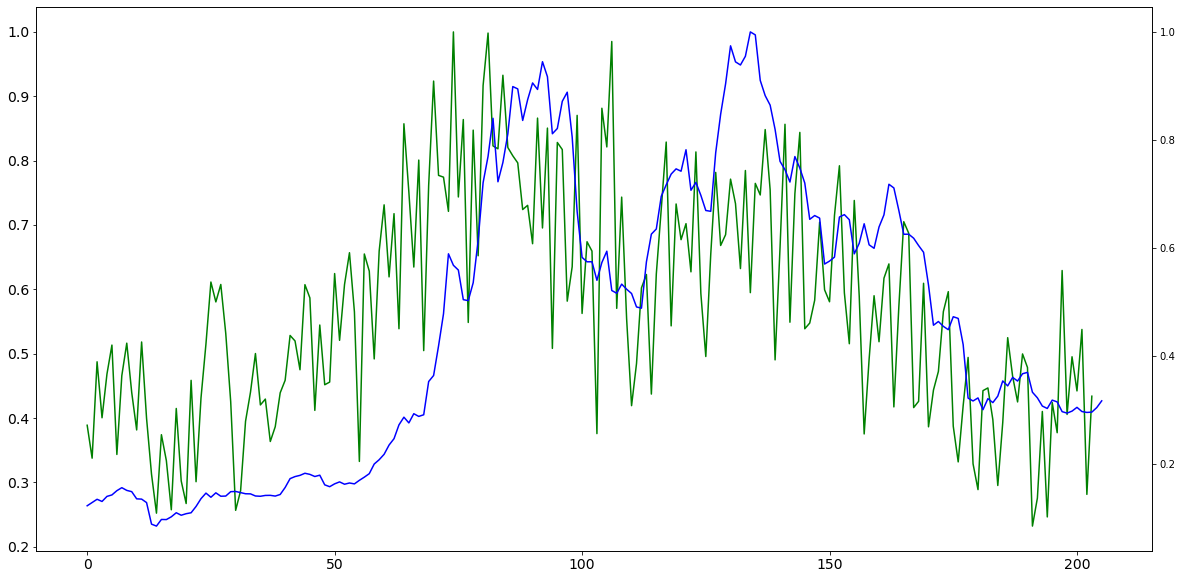

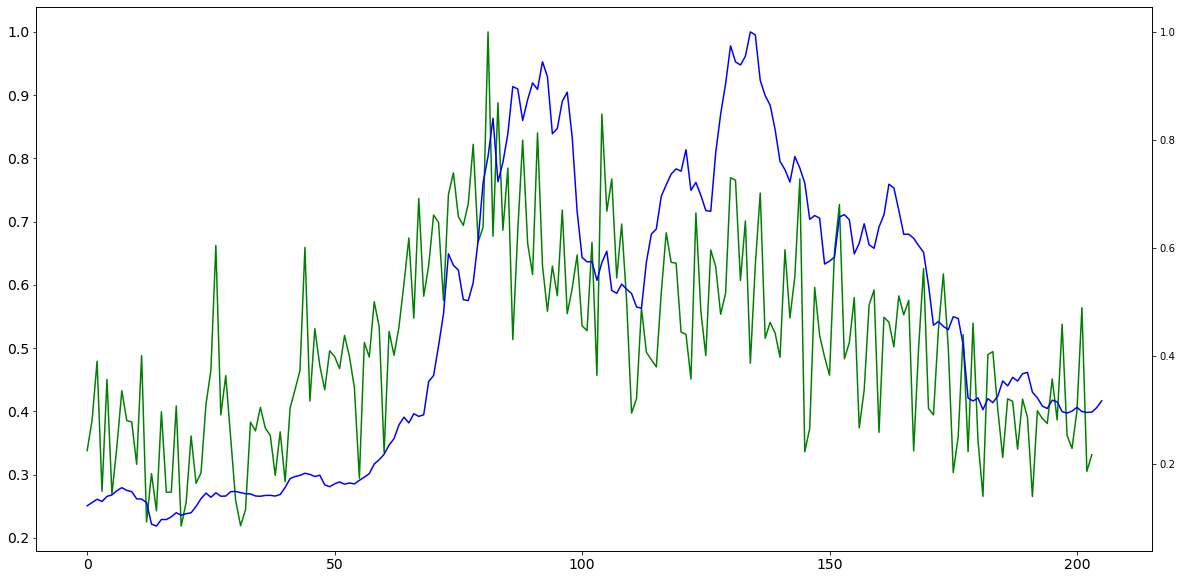

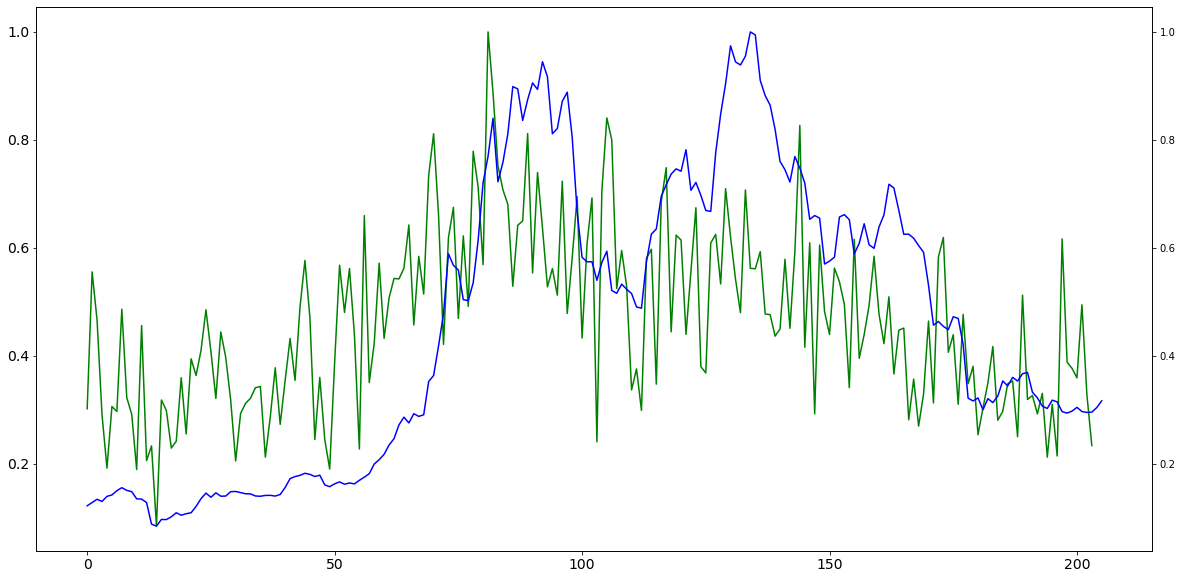

In [19]:
import numpy

fig, ax1 = plt.subplots(figsize=(20,10))
ax1.tick_params(labelsize=14)
ax2 = ax1.twinx()

ax1.plot(vader_sentiment_df_daterange.index, vader_sentiment_df_daterange['sentiment_score_norm'], 'g-')
ax2.plot(btc_df_daterange.index, btc_df_daterange["Normalize"], 'b-')


fig, ax3 = plt.subplots(figsize=(20,10))
ax3.tick_params(labelsize=14)
ax4 = ax3.twinx()

ax3.plot(textblob_sentiment_df_daterange.index, textblob_sentiment_df_daterange['sentiment_score_norm'], 'g-')
ax4.plot(btc_df_daterange.index, btc_df_daterange["Normalize"], 'b-')

fig, ax5 = plt.subplots(figsize=(20,10))
ax5.tick_params(labelsize=14)
ax6 = ax5.twinx()

ax5.plot(wordnet_sentiment_df_daterange.index, wordnet_sentiment_df_daterange['sentiment_score_norm'], 'g-')
ax6.plot(btc_df_daterange.index, btc_df_daterange["Normalize"], 'b-')


In [20]:
def crosscorr(datax, datay, lag=0, method="pearson"):
    return datax.corr(datay.shift(lag), method=method)

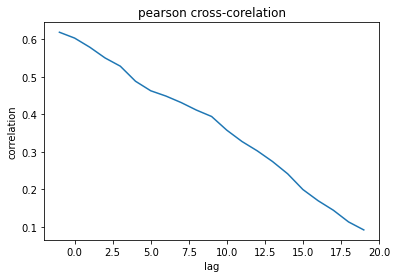

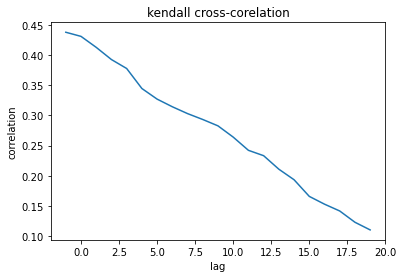

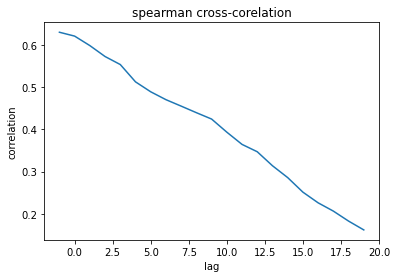

In [21]:
xcov = [crosscorr(vader_sentiment_df_daterange['sentiment_score_norm'], btc_df_daterange["Normalize"], lag=i, method="pearson") for i in range(-1,20)]
plt.plot(range(-1,20), xcov)
plt.title("pearson cross-corelation")
plt.xlabel("lag")
plt.ylabel("correlation")
plt.show()

xcov = [crosscorr(vader_sentiment_df_daterange['sentiment_score_norm'], btc_df_daterange["Normalize"], lag=i, method="kendall") for i in range(-1,20)]
plt.plot(range(-1,20), xcov)
plt.title("kendall cross-corelation")
plt.xlabel("lag")
plt.ylabel("correlation")
plt.show()

xcov = [crosscorr(vader_sentiment_df_daterange['sentiment_score_norm'], btc_df_daterange["Normalize"], lag=i, method="spearman") for i in range(-1,20)]
plt.plot(range(-1,20), xcov)
plt.title("spearman cross-corelation")
plt.xlabel("lag")
plt.ylabel("correlation")
plt.show()

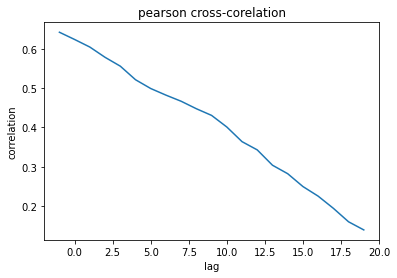

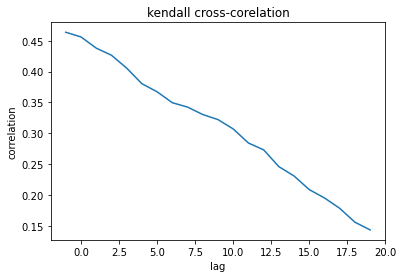

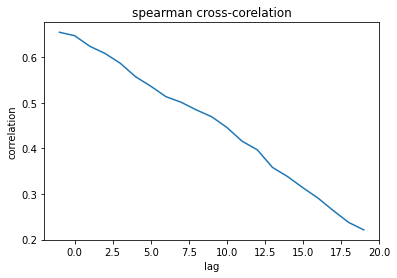

In [22]:
xcov = [crosscorr(textblob_sentiment_df_daterange['sentiment_score_norm'], btc_df_daterange["Normalize"], lag=i, method="pearson") for i in range(-1,20)]
plt.plot(range(-1,20), xcov)
plt.title("pearson cross-corelation")
plt.xlabel("lag")
plt.ylabel("correlation")
plt.show()

xcov = [crosscorr(textblob_sentiment_df_daterange['sentiment_score_norm'], btc_df_daterange["Normalize"], lag=i, method="kendall") for i in range(-1,20)]
plt.plot(range(-1,20), xcov)
plt.title("kendall cross-corelation")
plt.xlabel("lag")
plt.ylabel("correlation")
plt.show()

xcov = [crosscorr(textblob_sentiment_df_daterange['sentiment_score_norm'], btc_df_daterange["Normalize"], lag=i, method="spearman") for i in range(-1,20)]
plt.plot(range(-1,20), xcov)
plt.title("spearman cross-corelation")
plt.xlabel("lag")
plt.ylabel("correlation")
plt.show()

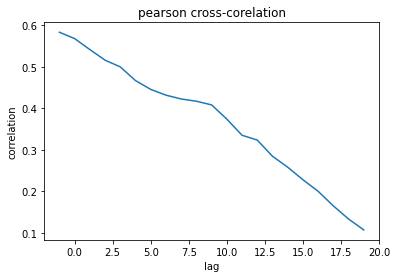

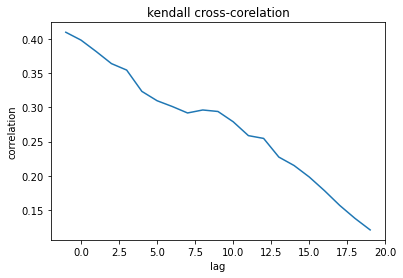

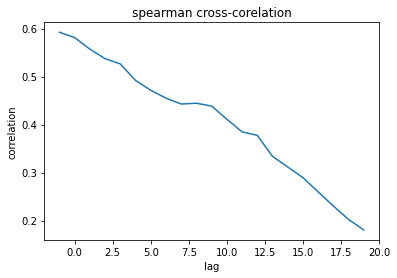

In [23]:
xcov = [crosscorr(wordnet_sentiment_df_daterange['sentiment_score_norm'], btc_df_daterange["Normalize"], lag=i, method="pearson") for i in range(-1,20)]
plt.plot(range(-1,20), xcov)
plt.title("pearson cross-corelation")
plt.xlabel("lag")
plt.ylabel("correlation")
plt.show()

xcov = [crosscorr(wordnet_sentiment_df_daterange['sentiment_score_norm'], btc_df_daterange["Normalize"], lag=i, method="kendall") for i in range(-1,20)]
plt.plot(range(-1,20), xcov)
plt.title("kendall cross-corelation")
plt.xlabel("lag")
plt.ylabel("correlation")
plt.show()

xcov = [crosscorr(wordnet_sentiment_df_daterange['sentiment_score_norm'], btc_df_daterange["Normalize"], lag=i, method="spearman") for i in range(-1,20)]
plt.plot(range(-1,20), xcov)
plt.title("spearman cross-corelation")
plt.xlabel("lag")
plt.ylabel("correlation")
plt.show()

In [24]:
aggregated_df =  pd.merge(vader_sentiment_df_daterange, btc_df_daterange, left_index=True, right_index=True)
aggregated_df_vs =aggregated_df.drop(['grouped_aggregated_sentiment_score','sentiment_score_diff','sentiment_score_derivative','Close_diff','Close_derivative'], axis=1)
aggregated_df_vs.head(3)

,date_x,neutral,positive,strong positive,strong negative,weak positive,weak negative,sentiment_score_norm,date_y,Close,Normalize
0,2020-01-01,47.0,33.0,1.0,0.0,34.0,0.0,0.388831,2020-01-06,8011.679980,0.123489
1,2020-01-06,50.0,33.0,2.0,0.0,37.0,0.0,0.337665,2020-01-11,8401.800293,0.129502
2,2020-01-11,28.0,33.0,5.0,0.0,37.0,0.0,0.487439,2020-01-16,8791.904102,0.135515


In [25]:
aggregated_df =  pd.merge(textblob_sentiment_df_daterange, btc_df_daterange, left_index=True, right_index=True)
aggregated_df_tb =aggregated_df.drop(['grouped_aggregated_sentiment_score','sentiment_score_diff','sentiment_score_derivative','Close_diff','Close_derivative'], axis=1)
aggregated_df_tb.head(3)

,date_x,neutral,positive,strong positive,strong negative,weak positive,weak negative,sentiment_score_norm,date_y,Close,Normalize
0,2020-01-01,46.0,26.0,0.0,0.0,43.0,0.0,0.338213,2020-01-06,8011.679980,0.123489
1,2020-01-06,47.0,30.0,2.0,0.0,43.0,0.0,0.386724,2020-01-11,8401.800293,0.129502
2,2020-01-11,27.0,37.0,1.0,0.0,38.0,0.0,0.479365,2020-01-16,8791.904102,0.135515


In [26]:
aggregated_df =  pd.merge(wordnet_sentiment_df_daterange, btc_df_daterange, left_index=True, right_index=True)
aggregated_df_wn =aggregated_df.drop(['grouped_aggregated_sentiment_score','sentiment_score_diff','sentiment_score_derivative','Close_diff','Close_derivative'], axis=1)
aggregated_df_wn.head(3)

,date_x,neutral,positive,strong positive,strong negative,weak positive,weak negative,sentiment_score_norm,date_y,Close,Normalize
0,2020-01-01,53.0,17.0,0.0,0.0,45.0,0.0,0.301621,2020-01-06,8011.679980,0.123489
1,2020-01-06,48.0,38.0,0.0,0.0,36.0,0.0,0.555220,2020-01-11,8401.800293,0.129502
2,2020-01-11,35.0,36.0,0.0,0.0,32.0,0.0,0.465423,2020-01-16,8791.904102,0.135515


# Price Prediction

In [27]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from termcolor import colored as cl
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression # OLS algorithm
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

X_vs = aggregated_df_vs[['sentiment_score_norm']].values 
Y_vs = aggregated_df_vs[['Normalize']].values 

X_tb = aggregated_df_tb[['sentiment_score_norm']].values 
Y_tb = aggregated_df_tb[['Normalize']].values 

X_wn = aggregated_df_wn[['sentiment_score_norm']].values 
Y_wn = aggregated_df_wn[['Normalize']].values 



# Support vector machine (Regression)

In [ ]:
param_grid = {'C': range(1, 100, 1), 'gamma': [100,10,1,0.1],'kernel': ['rbf']}
grid_rbf = GridSearchCV(SVR(),param_grid,verbose=0)
grid_rbf.fit(X_tb, Y_tb)

param_grid = {'C': range(1, 100, 1), 'degree': range(1, 3, 1) ,'gamma': [100,10,1,0.1],'kernel': ['poly']}
grid_poly = GridSearchCV(SVR(),param_grid,verbose=0)
grid_poly.fit(X_tb, Y_tb)

param_grid = {'C': range(1, 100, 1) , 'gamma': [100, 10,1,0.1],'kernel': ['sigmoid']}
grid_sigmoid = GridSearchCV(SVR(),param_grid,verbose=0)
grid_sigmoid.fit(X_tb, Y_tb)

print(grid_rbf.best_params_)
print(grid_poly.best_params_)
print(grid_sigmoid.best_params_)

In [176]:
param_grid = {'C': range(1, 50, 1), 'degree': range(1, 10, 1) ,'gamma': [10,1,0.1],'kernel': ['poly']}
grid = GridSearchCV(SVR(),param_grid,verbose=0)
grid.fit(X, Y)

print(grid.best_params_)

NameError: name 'Y' is not defined

In [ ]:
kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']#A function which returns the corresponding SVC model
def getClassifier(ktype):
    if ktype == 0:
        # Polynomial kernal
        return SVR(kernel='poly', degree=8, gamma=10, C=100)
    elif ktype == 1:
        # Radial Basis Function kernal
        return SVR(kernel='rbf', gamma=1, C=100)
    elif ktype == 2:
        # Sigmoid kernal
        return SVR(kernel='sigmoid', gamma=1)
    elif ktype == 3:
        # Linear kernal
        return SVR(kernel='linear', gamma=1)

In [ ]:
for i in range(4):
    # Separate data into test and training sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
    svclassifier = getClassifier(i) 
    svclassifier.fit(X_train, y_train)# Make prediction
    y_pred = svclassifier.predict(X_test)# Evaluate our model
    print("Evaluation:", kernels[i], "kernel")
    print(cl('Explained Variance Score of OLS model is {}'.format(evs(y_test, y_pred)), attrs = ['bold']))
    print(cl('R-Squared of OLS model is {}\n'.format(r2(y_test, y_pred)), attrs = ['bold']))

In [148]:
######

svr_lin  = SVR(kernel='linear', C=10)
svr_poly = SVR(kernel='poly', C=40, degree=3)
svr_rbf = SVR(kernel='rbf', C=100, gamma=9)
svr_sigmoid = SVR(kernel='sigmoid', gamma=0.6)

In [175]:
######

X_train, X_test, y_train, y_test = train_test_split(X_vs, Y_vs, test_size = 0.25, random_state = 10)
svr_rbf.fit(X_train, y_train)
ols_yhat = svr_rbf.predict(X_test)

In [176]:
from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score as r2 # evaluation metric

print(cl('Explained Variance Score of OLS model is {}'.format(evs(y_test, ols_yhat)), attrs = ['bold']))
print(cl('R-Squared of OLS model is {}'.format(r2(y_test, ols_yhat)), attrs = ['bold']))

Explained Variance Score of OLS model is 0.5254679628678132
R-Squared of OLS model is 0.4925836986284272


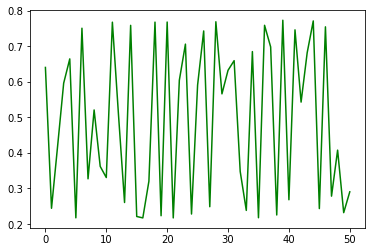

In [177]:
plt.plot(svr_rbf.predict(X_test), c='g', label='Linear model')

In [178]:
def get_data(df):  
    data = df.copy()
    data['date'] = data.index
    data['date'] = pd.to_numeric(data['date'])
    return [ data['date'].tolist(), data['sentiment_score_norm'].tolist() ] # Convert Series to list


dates, prices = get_data(aggregated_df_vs)

In [187]:
def predict_prices(dates, prices, x):
    dates = np.reshape(dates,(len(dates), 1)) # convert to 1xn dimension
    x = np.reshape(x,(len(x), 1))
    
    svr_lin  = SVR(kernel='linear', C=10)
    svr_poly = SVR(kernel='poly', C=10, degree=3)
    svr_rbf = SVR(kernel='rbf', C=100, gamma=9)
    
    # Fit regression model
    svr_lin.fit(dates, prices)
    svr_poly.fit(dates, prices)
    svr_rbf.fit(dates, prices)
    
    fig, ax = plt.subplots(figsize=(20,10))
    plt.scatter(dates, prices, c='k', label='Data')
    plt.plot(dates, svr_lin.predict(dates), c='g', label='Linear model')
    plt.plot(dates, svr_rbf.predict(dates), c='r', label='RBF model')    
    plt.plot(dates, svr_poly.predict(dates), c='b', label='Polynomial model')
    
    ax2 = ax.twinx()
    ax2.plot(btc_df_daterange.index, btc_df_daterange["Normalize"], 'y')
    
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.show()
    
    return svr_lin.predict(x)[0]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


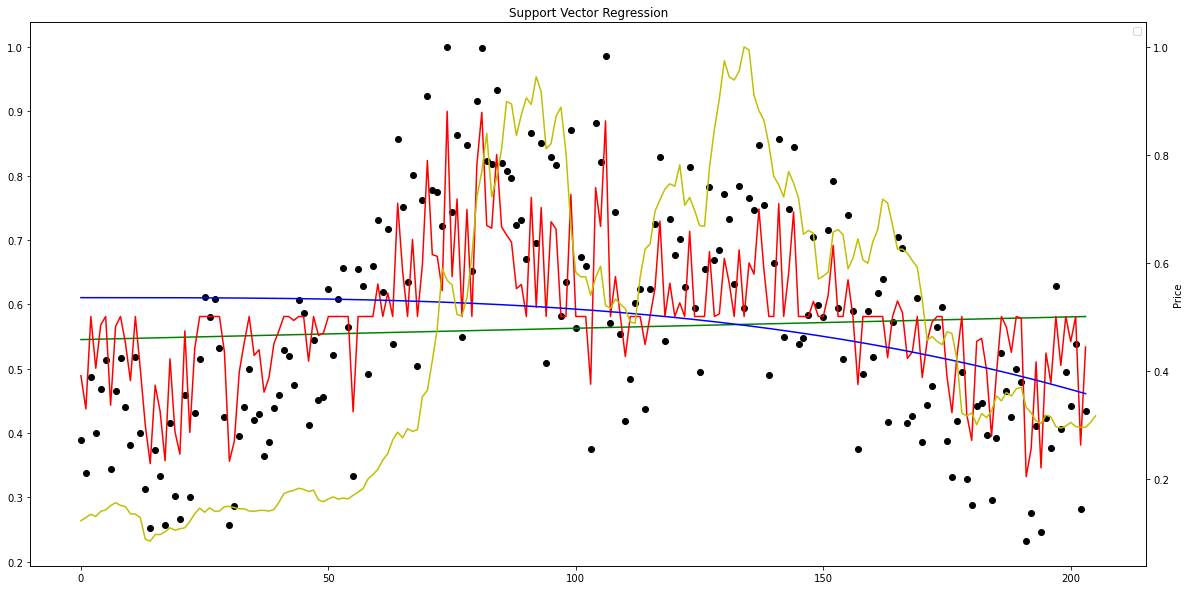

In [188]:
predicted_price = predict_prices(dates, prices, [31])

# naive bayes

In [185]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB

aggregated_df_wn["sentiment_diff"] = aggregated_df_wn.sentiment_score_norm.diff()
aggregated_df_wn["price_diff"] = aggregated_df_wn.Normalize.diff()
aggregated_df_wn["y"] = aggregated_df_wn["price_diff"].apply(lambda x: 1 if x > 0 else 0).shift(-1)

aggregated_df1 = aggregated_df_wn.drop(
   ["sentiment_score_norm", "date_y", "date_x", "Close", "Normalize", "price_diff"],
   axis=1,
).dropna()

In [182]:
X = aggregated_df1.drop(["y"], axis=1).values
y = aggregated_df1["y"].values
X_train, X_test, y_train, y_test = train_test_split(
   X,
   y,
   test_size=0.15,
   shuffle=False,
)
clf = BernoulliNB()
clf.fit(
   X_train,
   y_train,
)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.3870967741935484


In [183]:
X = aggregated_df1.drop(["y"], axis=1).values
y = aggregated_df1["y"].values
X_train, X_test, y_train, y_test = train_test_split(
   X,
   y,
   test_size=0.15,
   shuffle=False,
)
clf = GaussianNB()
clf.fit(
   X_train,
   y_train,
)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.4838709677419355


# LSTM

In [ ]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# https://keras.io/api/
#aggregated_df_vs
#aggregated_df_tb
#aggregated_df_wn

In [189]:
# 1) Using sentiment score as (80%)training set, crypto price as (20%)test set

In [ ]:
training_data_len = math.ceil(len(aggregated_df_vs)* 0.8)

train_data = aggregated_df_vs[0: training_data_len, :]

x_train = []
y_train = []

# Create a 60-days window of historical prices (i-60) as our feature data (x_train) 
# and the following 60-days window as label data (y_train).
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
model = keras.Sequential()
# Add a LSTM layer by giving it 100 network units. Set the return_sequence to true 
# so that the output of the layer will be another sequence of the same length
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))

# Add another LSTM layer with also 100 network units. But we set the return_sequence to false for this time 
# to only return the last output in the output sequence.
model.add(layers.LSTM(100, return_sequences=False))

# Add a densely connected neural network layer with 25 network units.
model.add(layers.Dense(25))

# add a densely connected layer that specifies the output of 1 network unit.
model.add(layers.Dense(1))
model.summary()

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=3)

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)